## Python script to produce Premier League Quadrant Analysis for team XG and Shots on Target

### Step 1 - Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 
%matplotlib inline



### Step 2 - Read in excel sheet with Prem 2022/23 season data

In [2]:
table = pd.read_excel(r'C:\Users\Documents\Python\Prem.xlsx',index_col=False)
table.head()

,date_GMT,status,Home,Away,GW,HTG,ATG,TG,HC,AC,HR,AR,HS,AS,HST,AST,HSoT,ASoT,HF,AF,HPos,APos,H_xg,A_xg,HOdds,XOdds,AOdds,O2.5
0,Aug 05 2022 - 7:00pm,complete,Crystal Palace,Arsenal,1,0,2,2,3,5,0,0,11,11,3,3,8,8,16,11,56,44,1.35,1.27,3.29,3.49,2.09,1.90
1,Aug 06 2022 - 11:30am,complete,Fulham,Liverpool,1,2,2,4,4,4,0,0,10,12,4,4,6,8,7,9,33,67,1.23,1.50,9.05,5.40,1.34,1.66
2,Aug 06 2022 - 2:00pm,complete,AFC Bournemouth,Aston Villa,1,2,0,2,5,5,0,0,6,10,4,2,2,8,18,16,34,66,0.80,1.08,3.10,3.53,2.30,1.95
3,Aug 06 2022 - 2:00pm,complete,Leeds United,Wolverhampton Wanderers,1,2,1,3,6,4,0,0,14,16,4,7,10,9,13,9,40,60,1.51,1.96,2.30,3.58,3.07,2.03
4,Aug 06 2022 - 2:00pm,complete,Newcastle United,Nottingham Forest,1,2,0,2,11,1,0,0,24,6,10,2,14,4,9,14,61,39,2.93,0.71,1.68,3.76,4.97,1.94


### Step 3 - Isolate required columns

In [3]:
df_data = pd.DataFrame(table, columns=['Home','Away','HST','AST','HPos','APos','H_xg','A_xg'])
df_data.head()

,Home,Away,HST,AST,HPos,APos,H_xg,A_xg
0,Crystal Palace,Arsenal,3,3,56,44,1.35,1.27
1,Fulham,Liverpool,4,4,33,67,1.23,1.50
2,AFC Bournemouth,Aston Villa,4,2,34,66,0.80,1.08
3,Leeds United,Wolverhampton Wanderers,4,7,40,60,1.51,1.96
4,Newcastle United,Nottingham Forest,10,2,61,39,2.93,0.71


### Step 4 - Create a new DF including only each team

In [4]:
teams_df = pd.DataFrame(df_data['Home'].unique(),columns=['Team'])
teams_df

,Team
0,Crystal Palace
1,Fulham
2,AFC Bournemouth
3,Leeds United
4,Newcastle United
5,Tottenham Hotspur
6,Everton
7,Leicester City
8,Manchester United
9,West Ham United


### Step 5 - Order data by team using 'groupby' function and reorganise DF

In [5]:
# Loop through teams and create new column with matches played
for i in teams_df:
    MP_h = df_data.groupby('Home').count()
    MP_a = df_data.groupby('Away').count()
    MP = MP_h + MP_a

# create new df of MP and use that index to create new 'team' column, then merge in with 'teams_df'
MP_df = pd.DataFrame(MP)
MP_df['Team'] = MP_df.index
teams_df = pd.merge(teams_df,MP_df, on=['Team'])
teams_df



,Team,APos,AST,A_xg,Away,HPos,HST,H_xg,Home
0,Crystal Palace,38,38,38,NaN,38,38,38,NaN
1,Fulham,38,38,38,NaN,38,38,38,NaN
2,AFC Bournemouth,38,38,38,NaN,38,38,38,NaN
3,Leeds United,38,38,38,NaN,38,38,38,NaN
4,Newcastle United,38,38,38,NaN,38,38,38,NaN
5,Tottenham Hotspur,38,38,38,NaN,38,38,38,NaN
6,Everton,38,38,38,NaN,38,38,38,NaN
7,Leicester City,38,38,38,NaN,38,38,38,NaN
8,Manchester United,38,38,38,NaN,38,38,38,NaN
9,West Ham United,38,38,38,NaN,38,38,38,NaN


In [6]:
teams_df.rename(columns = {'APos':'MP'}, inplace=True)
teams_df.head()

,Team,MP,AST,A_xg,Away,HPos,HST,H_xg,Home
0,Crystal Palace,38,38,38,NaN,38,38,38,NaN
1,Fulham,38,38,38,NaN,38,38,38,NaN
2,AFC Bournemouth,38,38,38,NaN,38,38,38,NaN
3,Leeds United,38,38,38,NaN,38,38,38,NaN
4,Newcastle United,38,38,38,NaN,38,38,38,NaN


In [7]:
teams_df.drop(['Home','AST','A_xg','Away','HPos','HST','H_xg'],inplace=True, axis = 1)
teams_df.head()

,Team,MP
0,Crystal Palace,38
1,Fulham,38
2,AFC Bournemouth,38
3,Leeds United,38
4,Newcastle United,38


In [8]:
teams_df.rename(columns = {'Team':'Home'}, inplace=True)
teams_df

,Home,MP
0,Crystal Palace,38
1,Fulham,38
2,AFC Bournemouth,38
3,Leeds United,38
4,Newcastle United,38
5,Tottenham Hotspur,38
6,Everton,38
7,Leicester City,38
8,Manchester United,38
9,West Ham United,38


### Step 6 - define a function to add columns of SOT & XG season averages for each team in each df row

In [9]:
def add_HST_XG_columns(df):
         
    df['HST_f_Av'] = round(df.groupby('Home')['HST'].transform('mean'),2)
    df['HST_ag_Av'] = round(df.groupby('Home')['AST'].transform('mean'),2)
    df['AST_f_Av'] = round(df.groupby('Away')['AST'].transform('mean'),2)
    df['AST_ag_Av'] = round(df.groupby('Away')['HST'].transform('mean'),2)
    
    df['Hxg_f_Av'] = round(df.groupby('Home')['H_xg'].transform('mean'),2)
    df['Hxg_ag_Av'] = round(df.groupby('Home')['A_xg'].transform('mean'),2)
    df['Axg_f_Ag'] = round(df.groupby('Away')['A_xg'].transform('mean'),2)
    df['Axg_ag_Av'] = round(df.groupby('Away')['H_xg'].transform('mean'),2)
    
    return df

df_data = add_HST_XG_columns(df_data)
df_data


,Home,Away,HST,AST,HPos,APos,H_xg,A_xg,HST_f_Av,HST_ag_Av,AST_f_Av,AST_ag_Av,Hxg_f_Av,Hxg_ag_Av,Axg_f_Ag,Axg_ag_Av
0,Crystal Palace,Arsenal,3,3,56,44,1.35,1.27,4.16,5.00,5.11,4.63,1.32,1.47,1.52,1.31
1,Fulham,Liverpool,4,4,33,67,1.23,1.50,4.95,6.16,5.21,4.84,1.50,1.52,1.49,1.30
2,AFC Bournemouth,Aston Villa,4,2,34,66,0.80,1.08,4.37,5.58,3.84,5.95,1.24,1.69,1.22,1.57
3,Leeds United,Wolverhampton Wanderers,4,7,40,60,1.51,1.96,4.84,4.95,3.42,6.00,1.50,1.48,1.22,1.66
4,Newcastle United,Nottingham Forest,10,2,61,39,2.93,0.71,5.89,3.63,3.21,6.37,1.75,1.02,1.04,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Everton,AFC Bournemouth,-1,-1,-1,-1,0.00,0.00,5.21,5.21,3.79,6.53,1.48,1.53,0.99,2.01
376,Leeds United,Tottenham Hotspur,-1,-1,-1,-1,0.00,0.00,4.84,4.95,4.89,5.84,1.50,1.48,1.40,1.72
377,Leicester City,West Ham United,-1,-1,-1,-1,0.00,0.00,4.63,4.21,4.32,5.74,1.27,1.33,1.34,1.71
378,Manchester United,Fulham,-1,-1,-1,-1,0.00,0.00,5.63,2.95,3.89,5.47,1.67,1.14,1.20,1.59


### Step 7 - Merge both df's

In [10]:
teams_df = pd.merge(teams_df,df_data, on=['Home'])
teams_df

,Home,MP,Away,HST,AST,HPos,APos,H_xg,A_xg,HST_f_Av,HST_ag_Av,AST_f_Av,AST_ag_Av,Hxg_f_Av,Hxg_ag_Av,Axg_f_Ag,Axg_ag_Av
0,Crystal Palace,38,Arsenal,3,3,56,44,1.35,1.27,4.16,5.00,5.11,4.63,1.32,1.47,1.52,1.31
1,Crystal Palace,38,Aston Villa,11,5,51,49,2.33,1.60,4.16,5.00,3.84,5.95,1.32,1.47,1.22,1.57
2,Crystal Palace,38,Brentford,5,4,49,51,1.53,1.36,4.16,5.00,4.05,6.26,1.32,1.47,1.13,1.81
3,Crystal Palace,38,Chelsea,4,4,36,64,1.06,1.55,4.16,5.00,4.53,5.00,1.32,1.47,1.39,1.38
4,Crystal Palace,38,Leeds United,6,5,55,45,1.60,1.45,4.16,5.00,4.26,6.00,1.32,1.47,1.29,1.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Liverpool,38,Nottingham Forest,7,6,81,19,1.96,1.33,6.68,4.21,3.21,6.37,1.96,1.09,1.04,1.86
376,Liverpool,38,Tottenham Hotspur,5,8,68,32,1.38,1.40,6.68,4.21,4.89,5.84,1.96,1.09,1.40,1.72
377,Liverpool,38,Fulham,4,4,58,42,1.80,1.21,6.68,4.21,3.89,5.47,1.96,1.09,1.20,1.59
378,Liverpool,38,Brentford,6,2,54,46,1.75,0.85,6.68,4.21,4.05,6.26,1.96,1.09,1.13,1.81


### Step 8 - Add columns for each team of their average XG and SOT difference

In [11]:
teams_df['Av_ST_dif'] = round((teams_df['HST_f_Av'] - teams_df['HST_ag_Av']) ,2)
teams_df['Av_XG_dif'] = round((teams_df['Hxg_f_Av'] - teams_df['Hxg_ag_Av']) ,2)
teams_df

,Home,MP,Away,HST,AST,HPos,APos,H_xg,A_xg,HST_f_Av,HST_ag_Av,AST_f_Av,AST_ag_Av,Hxg_f_Av,Hxg_ag_Av,Axg_f_Ag,Axg_ag_Av,Av_ST_dif,Av_XG_dif
0,Crystal Palace,38,Arsenal,3,3,56,44,1.35,1.27,4.16,5.00,5.11,4.63,1.32,1.47,1.52,1.31,-0.84,-0.15
1,Crystal Palace,38,Aston Villa,11,5,51,49,2.33,1.60,4.16,5.00,3.84,5.95,1.32,1.47,1.22,1.57,-0.84,-0.15
2,Crystal Palace,38,Brentford,5,4,49,51,1.53,1.36,4.16,5.00,4.05,6.26,1.32,1.47,1.13,1.81,-0.84,-0.15
3,Crystal Palace,38,Chelsea,4,4,36,64,1.06,1.55,4.16,5.00,4.53,5.00,1.32,1.47,1.39,1.38,-0.84,-0.15
4,Crystal Palace,38,Leeds United,6,5,55,45,1.60,1.45,4.16,5.00,4.26,6.00,1.32,1.47,1.29,1.66,-0.84,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Liverpool,38,Nottingham Forest,7,6,81,19,1.96,1.33,6.68,4.21,3.21,6.37,1.96,1.09,1.04,1.86,2.47,0.87
376,Liverpool,38,Tottenham Hotspur,5,8,68,32,1.38,1.40,6.68,4.21,4.89,5.84,1.96,1.09,1.40,1.72,2.47,0.87
377,Liverpool,38,Fulham,4,4,58,42,1.80,1.21,6.68,4.21,3.89,5.47,1.96,1.09,1.20,1.59,2.47,0.87
378,Liverpool,38,Brentford,6,2,54,46,1.75,0.85,6.68,4.21,4.05,6.26,1.96,1.09,1.13,1.81,2.47,0.87


### Step 9 - Drop unrequired columns and rename columns to suit

In [12]:
teams_df = teams_df[['Home','MP','Hxg_f_Av','Hxg_ag_Av','Av_XG_dif','HST_f_Av','HST_ag_Av','Av_ST_dif']]
teams_df = teams_df.drop_duplicates()
teams_df

,Home,MP,Hxg_f_Av,Hxg_ag_Av,Av_XG_dif,HST_f_Av,HST_ag_Av,Av_ST_dif
0,Crystal Palace,38,1.32,1.47,-0.15,4.16,5.00,-0.84
19,Fulham,38,1.50,1.52,-0.02,4.95,6.16,-1.21
38,AFC Bournemouth,38,1.24,1.69,-0.45,4.37,5.58,-1.21
57,Leeds United,38,1.50,1.48,0.02,4.84,4.95,-0.11
76,Newcastle United,38,1.75,1.02,0.73,5.89,3.63,2.26
95,Tottenham Hotspur,38,1.62,1.37,0.25,6.37,4.79,1.58
114,Everton,38,1.48,1.53,-0.05,5.21,5.21,0.00
133,Leicester City,38,1.27,1.33,-0.06,4.63,4.21,0.42
152,Manchester United,38,1.67,1.14,0.53,5.63,2.95,2.68
171,West Ham United,38,1.46,1.33,0.13,4.47,4.26,0.21


In [13]:
teams_df.rename(columns = {'Home':'Team','Hxg_f_Av':'XG_f_Av', 'Hxg_ag_Av': 'XG_ag_Av', 'HST_f_Av':'ST_f_Av', 'HST_ag_Av':'ST_ag_Av'}, inplace=True)
teams_df.reset_index(drop=True, inplace=True)
teams_df

,Team,MP,XG_f_Av,XG_ag_Av,Av_XG_dif,ST_f_Av,ST_ag_Av,Av_ST_dif
0,Crystal Palace,38,1.32,1.47,-0.15,4.16,5.00,-0.84
1,Fulham,38,1.50,1.52,-0.02,4.95,6.16,-1.21
2,AFC Bournemouth,38,1.24,1.69,-0.45,4.37,5.58,-1.21
3,Leeds United,38,1.50,1.48,0.02,4.84,4.95,-0.11
4,Newcastle United,38,1.75,1.02,0.73,5.89,3.63,2.26
5,Tottenham Hotspur,38,1.62,1.37,0.25,6.37,4.79,1.58
6,Everton,38,1.48,1.53,-0.05,5.21,5.21,0.00
7,Leicester City,38,1.27,1.33,-0.06,4.63,4.21,0.42
8,Manchester United,38,1.67,1.14,0.53,5.63,2.95,2.68
9,West Ham United,38,1.46,1.33,0.13,4.47,4.26,0.21


### Step 10 - Check averages prior to quadrant creation

In [14]:
Av_XG_for = teams_df['XG_f_Av'].mean()
Av_XG_ag = teams_df['XG_ag_Av'].mean()
print(round(Av_XG_for,2))
print(round(Av_XG_ag,2))

1.56
1.3


In [15]:
Av_ST_for = teams_df['ST_f_Av'].mean()
Av_ST_ag = teams_df['ST_ag_Av'].mean()
print(round(Av_ST_for,2))
print(round(Av_ST_ag,2))

5.33
4.45


### Step 11 - Code the SOT quadrant
#### Use matplotlib colour gallery for aesthetics. Loop through each team to plot their averages and trial and error quadrant marker text spacing

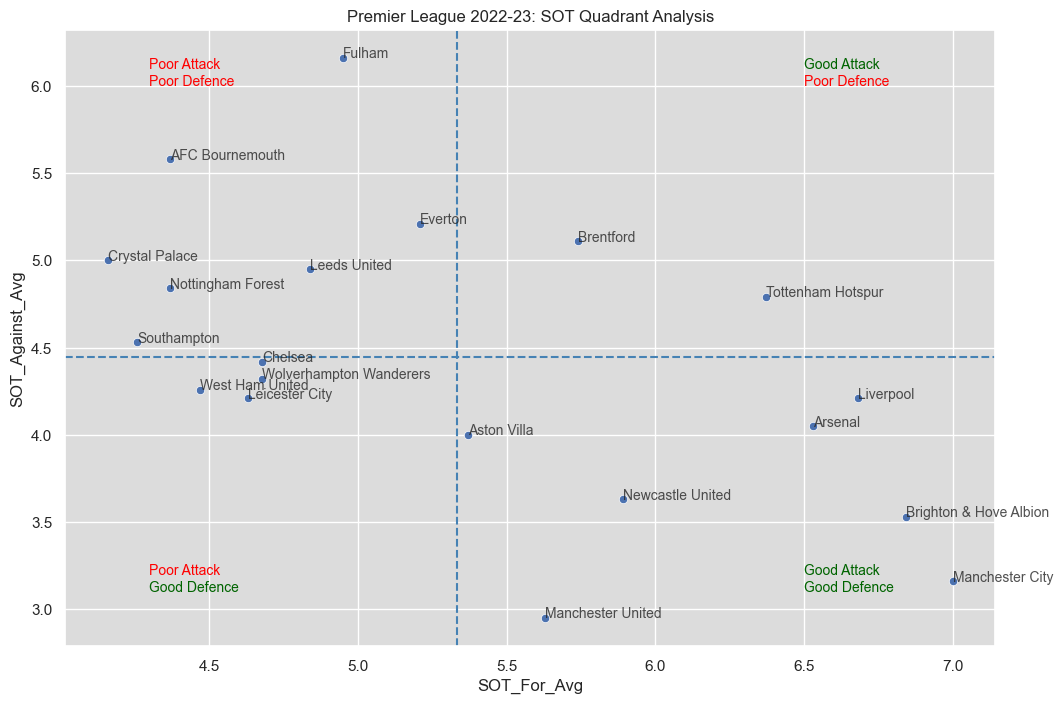

In [16]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'gainsboro', 'figure.facecolor':'white'}) #https://matplotlib.org/stable/gallery/color/named_colors.html

sns.scatterplot(data=teams_df, x='ST_f_Av', y='ST_ag_Av')
plt.title("Premier League 2022-23: SOT Quadrant Analysis")
plt.xlabel('SOT_For_Avg')
plt.ylabel('SOT_Against_Avg')

for i in range(teams_df.shape[0]):
          plt.text(teams_df.ST_f_Av[i], y=teams_df.ST_ag_Av[i], s=teams_df.Team[i], alpha=0.8, fontsize=10)
         

#Quadrant Markers  

#bottom right
plt.text(x=6.5, y=3.2, s="Good Attack",alpha=1,fontsize=10, color='darkgreen')
plt.text(x=6.5, y=3.1, s="Good Defence",alpha=1,fontsize=10, color='darkgreen')

#top right
plt.text(x=6.5, y=6.1, s="Good Attack",alpha=1,fontsize=10, color='darkgreen')
plt.text(x=6.5, y=6, s="Poor Defence",alpha=1,fontsize=10, color='red')

#top left
plt.text(x=4.3, y=6.1, s="Poor Attack", alpha=1,fontsize=10, color='red')
plt.text(x=4.3, y=6, s="Poor Defence", alpha=1,fontsize=10, color='red')

#bottom left
plt.text(x=4.3, y=3.2, s="Poor Attack", alpha=1,fontsize=10, color='red')
plt.text(x=4.3, y=3.1, s="Good Defence", alpha=1,fontsize=10, color='darkgreen')        

# Benchmark Mean values          
plt.axhline(y=teams_df.ST_ag_Av.mean(), color='steelblue', linestyle='--', linewidth=1.5)           
plt.axvline(x=teams_df.ST_f_Av.mean(), color='steelblue',linestyle='--', linewidth=1.5) 


plt.show()

### Step 12 - Code the XG Quadrant similarly

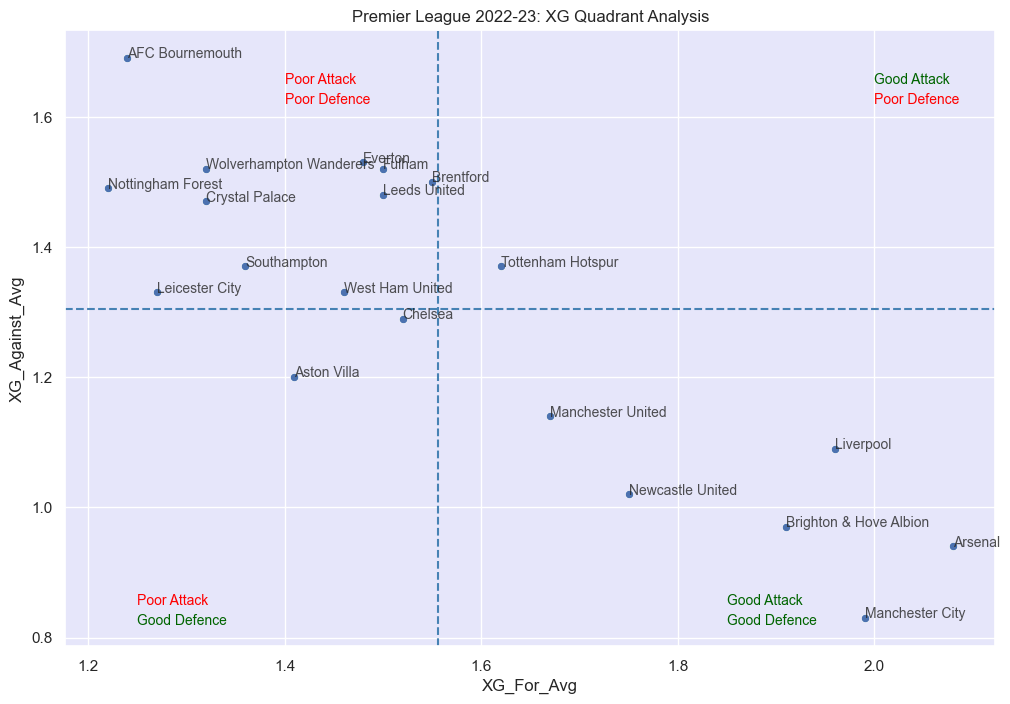

In [17]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'lavender', 'figure.facecolor':'white'}) #https://matplotlib.org/stable/gallery/color/named_colors.html

sns.scatterplot(data=teams_df, x='XG_f_Av', y='XG_ag_Av')
plt.title("Premier League 2022-23: XG Quadrant Analysis")
plt.xlabel('XG_For_Avg')
plt.ylabel('XG_Against_Avg')

for i in range(teams_df.shape[0]):
          plt.text(teams_df.XG_f_Av[i], y=teams_df.XG_ag_Av[i], s=teams_df.Team[i], alpha=0.8, fontsize=10)
         

#Quadrant Markers  

#bottom right
plt.text(x=1.85, y=0.85, s="Good Attack",alpha=1,fontsize=10, color='darkgreen')
plt.text(x=1.85, y=0.82, s="Good Defence",alpha=1,fontsize=10, color='darkgreen')

#top right
plt.text(x=2.00, y=1.65, s="Good Attack",alpha=1,fontsize=10, color='darkgreen')
plt.text(x=2.00, y=1.62, s="Poor Defence",alpha=1,fontsize=10, color='red')

#top left
plt.text(x=1.40, y=1.65, s="Poor Attack", alpha=1,fontsize=10, color='red')
plt.text(x=1.40, y=1.62, s="Poor Defence", alpha=1,fontsize=10, color='red')

#bottom left
plt.text(x=1.25, y=0.85, s="Poor Attack", alpha=1,fontsize=10, color='red')
plt.text(x=1.25, y=0.82, s="Good Defence", alpha=1,fontsize=10, color='darkgreen')        

# Benchmark Mean values          
plt.axhline(y=teams_df.XG_ag_Av.mean(), color='steelblue', linestyle='--', linewidth=1.5)           
plt.axvline(x=teams_df.XG_f_Av.mean(), color='steelblue',linestyle='--', linewidth=1.5) 


plt.show()